# Simple Bayesian

## Set up

In [1]:
%reset -s -f

In [1]:
import jax
import jax.numpy as np
from jax import random, vmap
from jax.config import config; config.update("jax_platform_name", "cpu")
from jax.scipy.special import logsumexp
import matplotlib
import matplotlib.pyplot as plt
import numpy as onp
import pandas as pd
import seaborn as sns

from numpyro.diagnostics import hpdi
import numpyro.distributions as dist
from numpyro.handlers import sample, seed, substitute, trace
from numpyro.hmc_util import initialize_model
from numpyro.mcmc import mcmc

%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 16,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14,
                     'axes.titlesize': 'large', 
                     'axes.labelsize': 'medium'})

# hv.opt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
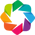

In [2]:
import holoviews as hv
# import 
from holoviews.operation.datashader import datashade, rasterize

hv.extension('bokeh') # important: doesn't render without it
hv.opts.defaults( hv.opts.Curve(width=800), hv.opts.Table(width= 800))

In [5]:
from bokeh.themes.theme import Theme

theme = Theme(
    json={
    'attrs' : {
        'Figure' : {
            'background_fill_color': '#2F2F2F',
            'border_fill_color': '#2F2F2F',
            'outline_line_color': '#444444',
        },
        'Grid': {
            'grid_line_dash': [6, 4],
            'grid_line_alpha': .3,
        },

        'Axis': {
            'major_label_text_color': 'white',
            'axis_label_text_color': 'white',
            'major_tick_line_color': 'white',
            'minor_tick_line_color': 'white',
            'axis_line_color': "white"
        },
        'Title': {
            'text_color': 'white'
        }
    }
})
hv.renderer('bokeh').theme = theme

In [3]:
from bokeh.themes import built_in_themes

## Test Data

### generating random data with Numpyro

> watch for use of random key in all sample statements

In [4]:
# Start from this source of randomness. We will split keys for subsequent operations.
rng = random.PRNGKey(0)
display(f"first rng {rng}")
rng_, rng = random.split(rng)
display(f"rng_  {rng_}, rng {rng}")


'first rng [0 0]'

'rng_  [4146024105  967050713], rng [2718843009 1272950319]'

In [5]:
# NB. sample takes a random key on every call
mu_r1 =  dist.Normal(0., 0.5).sample(rng, (5000,))
mu_r2 =  dist.Normal(5., 0.5).sample(rng, (5000,))
mu_r = np.concatenate([mu_r1, mu_r2])
res = dist.Normal(mu_r, 1.0).sample(rng, (1,))


### making histograms with Numpyro and holoviews

In [6]:
h = onp.histogram(mu_r,20, density=True)
hv.Histogram(h).opts(tools=['hover'])

:Histogram   [x]   (Frequency)

In [7]:
h = onp.histogram(res,20, density=True)
hv.Histogram(h).opts(tools=['hover'])

:Histogram   [x]   (Frequency)

In [8]:
n_samples = 1000
xs = np.linspace(0, 10, n_samples)
beta = 2.3 # random slope
noise = dist.Normal(0., 1.0).sample(rng, (n_samples,))
ys = xs * beta + noise 

In [9]:
# normalisation of data - otherwise HMC doesn't play nice.
xs = (xs - xs.mean())/ xs.std()
beta = 2.3 # random slope
noise = dist.Normal(0., 1.0).sample(rng, (n_samples,))
ys = xs * beta + noise 

In [10]:
hv.Scatter((xs,ys)).opts(bgcolor='black')

:Scatter   [x]   (y)

## Model definition

In [11]:
def model(xs=None, ys=None):
    b = sample('beta', dist.Normal(0., 10.))
    if (xs is not None):
        mu = xs * b
    # we keep this, even if ys is None...
    sample('obs', dist.Normal(mu, 1.0) , obs=ys)
    

## Posterior Distribution

In [12]:
# Start from this source of randomness. We will split keys for subsequent operations.
rng = random.PRNGKey(0)
rng_, rng = random.split(rng)

# Initialize the model.
init_params, potential_fn, constrain_fn = initialize_model(rng_, model, 
                                                           xs = xs,
                                                           ys = ys
                                                          )
num_warmup, num_samples = 1000, 2000

# Run NUTS.
samples_0 = mcmc(num_warmup, num_samples, init_params,
                 potential_fn=potential_fn, 
                 trajectory_length=10, 
                 constrain_fn=constrain_fn)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 813.94it/s, 1 steps of size 1.18e+00. acc. prob=0.86]




                           mean         sd       5.5%      94.5%      n_eff       Rhat
                beta       2.32       0.03       2.27       2.37     815.17       1.00


## Model evaluation 

We run our HMC magic and it spits out the right answer.

Note: initially I tried:

`sample('obs', mu , obs=ys)` but had to change it to 

`sample('obs', dist.Normal(mu, 1.0) , obs=ys)` 
    
to make it work with HMC.


In [17]:
# Start from this source of randomness. We will split keys for subsequent operations.
rng = random.PRNGKey(0)
rng_, rng = random.split(rng)

# Initialize the model.
init_params, potential_fn, constrain_fn = initialize_model(rng_, model, 
                                                           xs = xs,
                                                           ys = ys)
num_warmup, num_samples = 1000, 2000

# Run NUTS.
samples_1 = mcmc(num_warmup, num_samples, init_params,
                 potential_fn=potential_fn, 
                 trajectory_length=10, 
                 constrain_fn=constrain_fn)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 849.56it/s, 1 steps of size 1.18e+00. acc. prob=0.86]




                           mean         sd       5.5%      94.5%      n_eff       Rhat
                beta       2.32       0.03       2.27       2.37     815.17       1.00


## Prior Predictive 

this is generating model outputs given from a 

I want to able to generate many `obs` samples from many `beta`. How's about we try substituting a bunch of beta in there and see what happens eg. the same number of beta a xs?? or do we want to modify the model and get an outer product of sorts...

or use vmap to try multiple beta vals... and this worked. I substituted in new betas that were created with `dist.Normal(0,10).sample(rng, num_samples)` where `num_samples` is the number of `beta` samples.



In [18]:
rng

DeviceArray([2718843009, 1272950319], dtype=uint32)

In [19]:
random.split(rng)

DeviceArray([[3746991216, 1902760697],
             [1190051861, 3378399878]], dtype=uint32)

In [117]:
# predict can be used for prior predictions and posterior predictions depending on the post_samples we feed in.
def predict(rng, post_samples, model, *args, **kwargs):
    """
    :param rng : an array of seeds for random number generator
    :param post_samples : a dictionary (or an array of dictionaries) containing sample values for latent
        random variables
    :param model : a function containing primitive stochastic functions with names that match the dictionary 
        post_samples
    :param *args : positional args that may be used by model as input 
    :param **kwargs : kwargs that may be used by model.
    
    output : an array of the values returned by the model.
    """
    ## model gets "seeded" with random numbers
    seeded_model = seed(model, rng)
    ## model gets modified to replace named distributions with generated samples
    model_w_substituted_rvs = substitute(seeded_model, post_samples)
    model_trace = trace(model_w_substituted_rvs).get_trace(*args, **kwargs)
    return model_trace['obs']['value']

In [124]:
# vectorize predictions via vmap
predict_fn = vmap(lambda rng, samples: 
                  predict(rng, samples, model, xs=xs))
rng, rng_ = random.split(rng)


# prior_samples are the values that we will pass via 'beta' to our vmapped fn predict_fn
# prior_samples.shape == (num_samples,)
prior_samples = dist.Normal(0,10).sample(rng, (num_samples,))
assert(num_samples == samples_1['beta'].shape[0])

# rng_a.shape = (num_samples, 2)
rng_a = random.split(rng_, num_samples)
predictions_1 = predict_fn(rng_a, {'beta': prior_samples})

print(f'predictions shape (xs.shape = 1000): {predictions_1.shape}')
mean_pred = np.mean(predictions_1, axis=0)
hpdi_pred = hpdi(predictions_1, 0.9)

predictions shape (xs.shape = 1000): (2000, 1000)


In [123]:
hv.Scatter(
    (np.arange(num_samples),
     prior_samples),vdims='beta').opts(
        width=700, 
        title="beta values when no data is provided").hist()

:AdjointLayout
   :Scatter   [x]   (beta)
   :Histogram   [beta]   (beta_frequency)

the red dots are the actual data points $(xs,ys)$

the yellow line is the mean of the ys

the light mauve(?) is the 90% compatibility interval

In [127]:
def hv_plot_regression(x, y_mean, y_hpdi, post_mu=None, draw_lines = True):
    # Sort values for plotting by x axis
    idx = np.argsort(x)
    x_ord = x[idx]
    mean = y_mean[idx]
    hpdi = y_hpdi[:, idx]
#     y_ord = dset.y_ordScaled.values[idx]
    y_ord = ys[idx] # ..
    std_plot = (hv.Curve((x_ord, mean)).opts(tools=['hover'], height=400) * 
        hv.Points((x_ord, mean)).opts(tools=['hover'], size=4, color='orange') *
        hv.Scatter((x_ord, y_ord)).opts(color='red', size=4, tools=['hover']) * 
        hv.Area((x_ord, hpdi[1,:],hpdi[0,:]), vdims=['l','u']).opts(color='pink', alpha=0.3, tools=['hover']))
    final_plot = std_plot
    if (post_mu is not None) and draw_lines:
        lines = hv.Overlay([hv.Curve((x_ord, post_mu[i,idx])).opts(alpha=0.05, color='gray') for i in range(100)])
        dots = hv.Overlay([hv.Scatter((x_ord,post_mu[i,idx])) for i in range(50)])
        final_plot = std_plot * lines * dots
    return final_plot


In [128]:
hv_plot_regression(xs, mean_pred, hpdi_pred).opts(
    title='Predictions with 90% CI',
    xlabel='xs', ylabel='ys') 
# ax = plot_regression(dset.MarriageScaled.values, mean_pred, hpdi_pred)
# ax.set(xlabel='Marriage rate', ylabel='Divorce rate', title='Predictions with 90% CI');

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Points.I  :Points   [x,y]
   .Scatter.I :Scatter   [x]   (y)
   .Area.I    :Area   [x]   (l,u)

In [26]:
hv.Scatter((np.tile(xs[::5],(1000,1)).flatten(), predictions_1[:1000,::5].flatten())).opts(
size=1, alpha=0.1,width=700, title="model predictions prior to seeing evidence")

:Scatter   [x]   (y)

### Working `get_trace` example! 

Notes:

- the model must be `seed`ed first. 
    - this initial the random generators somewhow
- then we wrap it with `trace` which returns a _handler_, which has the method `get_trace`
- calling `get_trace` with some input data `xs=xs` (the first `xs` is a keyword in the model definition), we get back an `OrderedDict` which contains all keys for every `sample` call in our model.
- in the dict below, there are the keys `beta` and `obs`

In [130]:
trace(seed(model, rng)).get_trace(xs=xs[:30])

OrderedDict([('beta',
              {'type': 'sample',
               'name': 'beta',
               'fn': <numpyro.distributions.continuous.Normal at 0x137ead860>,
               'args': (),
               'kwargs': {'random_state': DeviceArray([1125904127, 3170498681], dtype=uint32)},
               'value': DeviceArray(-10.566828, dtype=float32),
               'is_observed': False}),
             ('obs',
              {'type': 'sample',
               'name': 'obs',
               'fn': <numpyro.distributions.continuous.Normal at 0x137a65d30>,
               'args': (),
               'kwargs': {'random_state': DeviceArray([1928153818, 1370345685], dtype=uint32)},
               'value': DeviceArray([18.6387043, 18.34534836, 16.45342636, 17.64190102,
                            19.6612854, 19.19591331, 16.43826485, 18.67320824,
                            17.52788353, 20.56993866, 16.95570946, 18.21452332,
                            17.71701813, 16.68530846, 17.47344398, 18.073219

In [131]:
# here we run the model and get the trace
# we verify that if we pass in the ys=ys then these are exactyl the 'obs' values
trace2 = trace(seed(model, rng)).get_trace(xs=xs, ys=ys)
assert (trace2['obs']['value'] == ys).all()

In [132]:
obs_vals = trace(seed(model, rng)).get_trace(xs=xs)['obs']['value']

In [133]:
hv.Scatter((xs, obs_vals))

:Scatter   [x]   (y)

In [138]:
trace(seed(model, rng)).get_trace(xs=xs)['beta']['value']

DeviceArray(-10.566828, dtype=float32)

In [139]:
trace(seed(model, random.split(rng)[0])).get_trace(xs=xs)['beta']['value']

DeviceArray(13.254546, dtype=float32)

In [140]:
trace(seed(model, random.split(rng)[0])).get_trace(xs=xs)['beta']['value']

DeviceArray(13.254546, dtype=float32)

In [141]:
trace(seed(model, random.split(rng)[1])).get_trace(xs=xs)['beta']['value']

DeviceArray(9.337745, dtype=float32)

## Explore Samples

In [142]:
samples_1.keys()

dict_keys(['beta'])

Note: by appending the `.hist()` function we get the same histogram as the following graph.

In [143]:
hv.Scatter((np.arange(2000),samples_1['beta']),vdims='beta').opts(
    width=700,tools=['hover']).hist()

:AdjointLayout
   :Scatter   [x]   (beta)
   :Histogram   [beta]   (beta_frequency)

In [144]:
h = onp.histogram(samples_1['beta'],20, density=True)
hv.Histogram(h).opts(tools=['hover'])

:Histogram   [x]   (Frequency)

Actual $\beta$ was $2.3$. Interestingly, 2.3 is not within 1 standard deviation of $\hat{\beta}$. (I wonder if this would change if we normalized our data first...)[it did].

Normalized the inputs (which normalized the outputs?) and this changed the hpdi considerably. Even though `beta.mean()` did not change, the spread of the `beta` got much larger.

In [145]:
samples_1['beta'].mean()

DeviceArray(2.3200028, dtype=float32)

In [146]:
samples_1['beta'].std()

DeviceArray(0.03144953, dtype=float32)

In [147]:
hpdi(samples_1['beta'],prob=0.9)

array([2.2682095, 2.3716478], dtype=float32)

## Predictive Posterior

the __predictive posterior__ is the distribution of the observed variables using the _posterior_ distribution of the latent variable as determined by the data, the prior distribution and the model.

observation: because I used the same seed for the `dist.Normal().sample(.)` the predictive results are _very_ close. Zoom in on the results to see.

I'm not sure if this correct way to calculate the predictive posterior. I am taking the mean of the 

In [154]:
samples_1['beta'].shape

(2000,)

In [156]:
xs.shape

(1000,)

In [157]:
betas = samples_1['beta']

In [174]:
obs = np.expand_dims(betas,-1) * xs

In [175]:
obs.shape

(2000, 1000)

In [176]:
obs[::100,::10].shape

(20, 100)

In [177]:
yy_= obs[::100,::10]

In [180]:

import xarray as xr
import hvplot.xarray
import hvplot.pandas

In [178]:
yy_[0,:].shape, xs[::10].shape

((100,), (100,))

In [222]:
x_step =2 
idx = np.argsort(xs)
p_d = {i:hv.Curve((xs[::x_step],obs[i*10,::x_step]  \
#                    +  dist.Normal().sample(rng, ( 1000//x_step,))
                  )) 
       for i in range(40)}

In [231]:
hv.NdOverlay(p_d).opts(width=700, show_legend=False) * hv.Scatter((xs,ys)).opts(alpha=0.2)

:Overlay
   .NdOverlay.I :NdOverlay   [Element]
      :Curve   [x]   (y)
   .Scatter.I   :Scatter   [x]   (y)

In [214]:
y_p = ((samples_1['beta'] * np.expand_dims(xs,-1)).mean(axis=1) + 
dist.Normal().sample(rng, (1000,)))

In [232]:
hv.Scatter((xs,y_p)).opts(alpha=0.4) * hv.Scatter((xs,ys)).opts(
    tools=['hover'], alpha=0.4, width=700)

:Overlay
   .Scatter.I  :Scatter   [x]   (y)
   .Scatter.II :Scatter   [x]   (y)

In [43]:
y_p2 = ((samples_1['beta'].mean() * xs) + 
dist.Normal().sample(rng, (1000,)))

In [44]:
hv.Scatter((xs,y_p2)).opts(alpha=0.4) * hv.Scatter((xs,ys)).opts(
    tools=['hover'], alpha=0.4)

:Overlay
   .Scatter.I  :Scatter   [x]   (y)
   .Scatter.II :Scatter   [x]   (y)

In [150]:
# this is what I need to understand:
# we use substitute the model's beta=Normal(.) with post_samples (eg. samples of our beta)
# then we run trace(model).get_trace(.) to get a new set of observations ie. ys

def predict(rng, post_samples, model, *args, **kwargs):
    """
    :param rng : an array of seeds for random number generator
    :param post_samples : a dictionary (or an array of dictionaries) containing sample values for latent
        random variables
    :param model : a function containing primitive stochastic functions with names that match the dictionary 
        post_samples
    :param *args : positional args that may be used by model as input 
    :param **kwargs : kwargs that may be used by model.
    
    output : an array of the values returned by the model.
    """
    ## model gets modified to replace named distributions with generated samples
    model = substitute(seed(model, rng), post_samples)
 
    ## this code is very similar to lines 42.. in rethinking.py
    ## can I try this on the original model? 
    ## not yet... 
    model_trace = trace(model).get_trace(*args, **kwargs)
    return model_trace['obs']['value']

In [151]:
# vectorize predictions via vmap
predict_fn = vmap(lambda rng, samples: 
                  predict(rng, samples, model, xs=xs))
rng, rng_ = random.split(rng)

# samples_1 is a dict having a key 'beta' which has all of the generated values of beta
# random.split(rng_, num_samples) generates an array of random keys 

## jm: num_samples must equal the number of beta samples we're sending in 
assert(num_samples == samples_1['beta'].shape[0])
predictions_1 = predict_fn(random.split(rng_, num_samples), samples_1)

print(f'predictions shape (xs.shape = 1000): {predictions_1.shape}')
mean_pred = np.mean(predictions_1, axis=0)
hpdi_pred = hpdi(predictions_1, 0.9)

predictions shape (xs.shape = 1000): (2000, 1000)


In [233]:
# vectorize predictions via vmap
predict_fn = vmap(lambda rng, samples: 
                  predict(rng, samples, model, xs=xs))
rng, rng_ = random.split(rng)

# samples_1 is a dict having a key 'beta' which has all of the generated values of beta
# random.split(rng_, num_samples) generates an array of random keys 


## jm: num_samples must equal the number of beta samples we're sending in 
assert(num_samples == samples_1['beta'].shape[0])
nn = 80
n_samples = dict()

n_samples['beta'] = samples_1['beta'][:nn]
print(f"n_samples['beta'].shape = {n_samples['beta'].shape}")
rng_a = random.split(rng_, nn)
print(f'rng_ shape is {rng_a.shape}' )
predictions_10 = predict_fn(rng_a, n_samples)

mean_pred = np.mean(predictions_10, axis=0)
hpdi_pred = hpdi(predictions_10, 0.9)

print(f'predictions shape: {predictions_1.shape}')

n_samples['beta'].shape = (80,)
rng_ shape is (80, 2)
predictions shape: (2000, 1000)


In [234]:
hv_plot_regression(xs, mean_pred, hpdi_pred).opts(
    title='Predictions with 90% CI',
    xlabel='xs', ylabel='ys') 
# ax = plot_regression(dset.MarriageScaled.values, mean_pred, hpdi_pred)
# ax.set(xlabel='Marriage rate', ylabel='Divorce rate', title='Predictions with 90% CI');

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Points.I  :Points   [x,y]
   .Scatter.I :Scatter   [x]   (y)
   .Area.I    :Area   [x]   (l,u)

In [49]:
# this plots the first 50 beta*xs + noise
hv.Scatter((np.tile(xs,(50,1)).flatten(), predictions_1[:50].flatten())).opts(
size=1, alpha=0.2,width=700)
# ax = plot_regression(dset.MarriageScaled.values, mean_pred, hpdi_pred)
# ax.set(xlabel='Marriage rate', ylabel='Divorce rate', title='Predictions with 90% CI');

:Scatter   [x]   (y)

### explorations

```
Init signature: substitute(fn=None, param_map=None)
Docstring:     
Given a callable `fn` and a dict `param_map` keyed by site names,
return a callable which substitutes all primitive calls in `fn` with
values from `param_map` whose key matches the site name. If the
site name is not present in `param_map`, there is no side effect.

:param fn: Python callable with NumPyro primitives.
:param dict param_map: dictionary of `numpy.ndarray` values keyed by
   site names.

**Example:**

 .. testsetup::

   from jax import random
   from numpyro.handlers import sample, seed, substitute, trace
   import numpyro.distributions as dist

.. doctest::

   >>> def model():
   ...     sample('a', dist.Normal(0., 1.))

   >>> model = seed(model, random.PRNGKey(0))
   >>> exec_trace = trace(substitute(model, {'a': -1})).get_trace()
   >>> assert exec_trace['a']['value'] == -1
File:           ~/anaconda3/envs/pytorch_exp/lib/python3.7/site-packages/numpyro/handlers.py
Type:           type
```

In [50]:
m1 = substitute(seed(model,random.split(rng_,num_samples)), samples_1)

### Working `substitute` example!

In [51]:
mj = substitute(seed(model, rng), {'beta': 3.0})
trace(mj).get_trace(xs=xs[:10])

OrderedDict([('beta',
              {'type': 'sample',
               'name': 'beta',
               'fn': <numpyro.distributions.continuous.Normal at 0x1282f17b8>,
               'args': (),
               'kwargs': {'random_state': DeviceArray([4208367169, 4259729531], dtype=uint32)},
               'value': 3.0,
               'is_observed': False}),
             ('obs',
              {'type': 'sample',
               'name': 'obs',
               'fn': <numpyro.distributions.continuous.Normal at 0x11dfd46d8>,
               'args': (),
               'kwargs': {'random_state': DeviceArray([1000831436, 1669067330], dtype=uint32)},
               'value': DeviceArray([-5.2834425, -5.66685724, -5.8186264, -8.00216675,
                            -4.39693546, -4.35063934, -4.31118011, -4.93547249,
                            -4.33917046, -4.26511097], dtype=float32),
               'is_observed': False})])

In [52]:
# IMPORTANT: must have rng.shape[0]=2, 1 <= 'beta'.shape[0] <= 2
rngs = random.split(rng, 10)[0]
print(rngs, rngs.shape)
seeded_model = seed(model, rngs)
mj = substitute(seeded_model, {'beta': np.array([3.0 ])})
trace(mj).get_trace(xs=xs[:9])

[2794731673 2000959759] (2,)


OrderedDict([('beta',
              {'type': 'sample',
               'name': 'beta',
               'fn': <numpyro.distributions.continuous.Normal at 0x126732400>,
               'args': (),
               'kwargs': {'random_state': DeviceArray([2794731673, 2000959759], dtype=uint32)},
               'value': DeviceArray([3.], dtype=float32),
               'is_observed': False}),
             ('obs',
              {'type': 'sample',
               'name': 'obs',
               'fn': <numpyro.distributions.continuous.Normal at 0x12712b160>,
               'args': (),
               'kwargs': {'random_state': DeviceArray([810275497,  80921772], dtype=uint32)},
               'value': DeviceArray([-6.86069679, -3.72973919, -4.63487673, -4.60177422,
                            -6.42381191, -4.66103458, -6.22156429, -4.66519594,
                            -6.36115789], dtype=float32),
               'is_observed': False})])

```
Init signature: trace(fn=None)
Docstring:     
Returns a handler that records the inputs and outputs at primitive calls
inside `fn`.

**Example**

.. testsetup::

   from jax import random
   import numpyro.distributions as dist
   from numpyro.handlers import sample, seed, trace
   import pprint as pp

.. doctest::

   >>> def model():
   ...     sample('a', dist.Normal(0., 1.))

   >>> exec_trace = trace(seed(model, random.PRNGKey(0))).get_trace()
   >>> pp.pprint(exec_trace)  # doctest: +SKIP
   OrderedDict([('a',
                 {'args': (),
                  'fn': <numpyro.distributions.continuous.Normal object at 0x7f9e689b1eb8>,
                  'is_observed': False,
                  'kwargs': {'random_state': DeviceArray([0, 0], dtype=uint32)},
                  'name': 'a',
                  'type': 'sample',
                  'value': DeviceArray(-0.20584235, dtype=float32)})]
```


In [53]:
mt = trace(m1)

### `get_trace` doc string
```
Signature: mt.get_trace(*args, **kwargs)
Docstring:
Run the wrapped callable and return the recorded trace.

:param `*args`: arguments to the callable.
:param `**kwargs`: keyword arguments to the callable.
:return: `OrderedDict` containing the execution trace.
File:      ~/anaconda3/envs/pytorch_exp/lib/python3.7/site-packages/numpyro/handlers.py
Type:      method
```

In [54]:
m2 = seed(model,rng)

In [55]:
mgt = mt.get_trace(xs=xs)

ValueError: too many values to unpack (expected 2)

In [171]:
mgt = mt.get_trace(xs=xs)

ValueError: too many values to unpack (expected 2)

In [56]:
m1.param_map

{'beta': DeviceArray([2.28640032, 2.32110643, 2.29702497, ..., 2.29817939,
              2.29837775, 2.29807591], dtype=float32)}

In [57]:
m1.fn, m1.fn.fn

(<numpyro.handlers.seed at 0x12699fef0>,
 <function __main__.model(xs=None, ys=None)>)

-------------

In [58]:
mean_pred.shape

(1000,)

In [59]:
hpdi_pred.shape

(2, 1000)

In [60]:
se

NameError: name 'se' is not defined

## vmap, tile, broadcast

In [89]:
xv = np.array([1.,2., 3,])
yv = np.array([4., 5.])

In [90]:
vv = lambda x, y: np.vdot(x, y)  #  ([a], [a]) -> []
vvv = lambda x, y: x + y

In [91]:
# (0, None) 'means...' 0 axis means first arg is the row of shape b, and None means all of it (I think)
# but how does the "out" parameter do?
mv = vmap(vv, (0, None), 0)      #  ([a,b], [b]) -> [a]

mvv = vmap(vvv, (0, None), 0)      #  ([a,b], [b]) -> [a]

In [92]:
vvv(xv,xv)

DeviceArray([2., 4., 6.], dtype=float32)

In [93]:
mvv(xv,xv)

DeviceArray([[2., 3., 4.],
             [3., 4., 5.],
             [4., 5., 6.]], dtype=float32)

In [94]:
# xv = [1 2 3]
# iterate over rows x all -> 
print(vmap(vvv, (0, None), 1)(xv, xv **2 ))
xv16 = xv.tile((1,2))
xv23 = xv.tile((2,1)).cumsum(axis=0)

print(xv.tile((1,2)), xv.tile((1,2)).shape, xv**2)
print(xv.tile((2,1)), xv.tile((2,1)).shape, xv**2)
# iterate over columns x all -> 
print("\n(1,None),0)\n",vmap(vvv, (1, None), 0)(xv16, xv **2 ))
print("\n(1,None),1)\n",vmap(vvv, (1, None), 1)(xv16, xv **2 ))
print("\n(0,None),0)\n",vmap(vvv, (0, None), 0)(xv23, xv **2 ))
print("\n(0,None),0)\n",vmap(vvv, (0, None), 1)(xv23, xv **2 ))
print("\n(1,0),0)\n",vmap(vvv, (1, 0), 0)(xv23, xv **2 ))
# print("\n(0,0),0)\n",vmap(vvv, (0, None), 1)(xv23, xv **2 ))
 

[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [10. 11. 12.]]
[[1. 2. 3. 1. 2. 3.]] (1, 6) [1. 4. 9.]
[[1. 2. 3.]
 [1. 2. 3.]] (2, 3) [1. 4. 9.]

(1,None),0)
 [[ 2.  5. 10.]
 [ 3.  6. 11.]
 [ 4.  7. 12.]
 [ 2.  5. 10.]
 [ 3.  6. 11.]
 [ 4.  7. 12.]]

(1,None),1)
 [[ 2.  3.  4.  2.  3.  4.]
 [ 5.  6.  7.  5.  6.  7.]
 [10. 11. 12. 10. 11. 12.]]

(0,None),0)
 [[ 2.  6. 12.]
 [ 3.  8. 15.]]

(0,None),0)
 [[ 2.  3.]
 [ 6.  8.]
 [12. 15.]]

(1,0),0)
 [[ 2.  3.]
 [ 6.  8.]
 [12. 15.]]


In [95]:
xv16 = xv.tile((1,2))
xv23 = xv.tile((2,1)).cumsum(axis=0)

def vmap_exp(a1, a2, in_shape, out_shape):
    print("\n a1 ", a1, a1.shape)
    print("\n a2 ", a2, a2.shape)
    print(f"\n {in_shape},{out_shape}\n",vmap(vvv, in_shape, out_shape)(a1,a2 ))
    
# vmap_exp(xv23, (xv**2).tile((2,1)), (1,1),1)
vmap_exp(xv23, (xv**2).tile((2,1)).T, (1,0),1)

 


 a1  [[1. 2. 3.]
 [2. 4. 6.]] (2, 3)

 a2  [[1. 1.]
 [4. 4.]
 [9. 9.]] (3, 2)

 (1, 0),1
 [[ 2.  6. 12.]
 [ 3.  8. 15.]]


In [96]:
# (None, 1) : take all of first arg, and axis 1 or COLUMN of 2nd arg. (this is working)
mm = vmap(mv, (None, 1), 1)      #  ([a,b], [b,c]) -> [a,c]
mm0 = vmap(mv, (None, 1), 0)      #  ([a,b], [b,c]) -> [a,c]
mmm = vmap(mv, (None, 1), 0)      #  ([a,b], [b,c]) -> [a,c]


In [97]:
dv = vmap(vv)

In [98]:
_a = xv.broadcast((2,1))
_a, _a.shape

(DeviceArray([[[1., 2., 3.]],
 
              [[1., 2., 3.]]], dtype=float32), (2, 1, 3))

In [99]:
_a = xv.broadcast((1,2))
_a, _a.shape

(DeviceArray([[[1., 2., 3.],
               [1., 2., 3.]]], dtype=float32), (1, 2, 3))

In [100]:
# tile: each position gives how many copies is the positions axis
# m.tile((a,b,c)) gives a cop
xv, xv.tile((1,2)), xv.tile((2,1)), xv.tile((2,1)).tile((3,1))

(DeviceArray([1., 2., 3.], dtype=float32),
 DeviceArray([[1., 2., 3., 1., 2., 3.]], dtype=float32),
 DeviceArray([[1., 2., 3.],
              [1., 2., 3.]], dtype=float32),
 DeviceArray([[1., 2., 3.],
              [1., 2., 3.],
              [1., 2., 3.],
              [1., 2., 3.],
              [1., 2., 3.],
              [1., 2., 3.]], dtype=float32))

In [104]:
dv(xv,xv)

DeviceArray([1., 4., 9.], dtype=float32)

In [105]:
xv22 = xv.tile((2,2)); xv22, xv22.shape

(DeviceArray([[1., 2., 3., 1., 2., 3.],
              [1., 2., 3., 1., 2., 3.]], dtype=float32), (2, 6))

In [106]:
dv(xv22, xv22)

DeviceArray([28., 28.], dtype=float32)

In [107]:
dv(xv22.T, xv22.T)

DeviceArray([ 2.,  8., 18.,  2.,  8., 18.], dtype=float32)

In [108]:
yv.tile((2,1)).shape, yv.tile((4,1)).cumsum(axis=0)

((2, 2), DeviceArray([[ 4.,  5.],
              [ 8., 10.],
              [12., 15.],
              [16., 20.]], dtype=float32))

In [109]:
rm = onp.random.rand(4,2)
rm, xv22

(array([[0.5897238 , 0.64695056],
        [0.38071109, 0.6700368 ],
        [0.97237385, 0.79097166],
        [0.74854877, 0.73138858]]), DeviceArray([[1., 2., 3., 1., 2., 3.],
              [1., 2., 3., 1., 2., 3.]], dtype=float32))

In [110]:
mm(xv22.cumsum(axis=0), rm) 

TypeError: Incompatible shapes for dot: got (2, 6) and (4, 2).

In [111]:
mm0(xv22.cumsum(axis=0), rm) 

TypeError: Incompatible shapes for dot: got (2, 6) and (4, 2).

In [79]:
mm0(xv22.tile((2,1)), xv22.T **2)

NameError: name 'mm0' is not defined

In [80]:
xv21 = xv.tile((2,1)); xv21

NameError: name 'xv' is not defined

In [81]:
xv22.shape

NameError: name 'xv22' is not defined

In [82]:
# (2,4) x (4,2) -> (2,2)
mm(xv22, xv22.T)

NameError: name 'mm' is not defined

In [83]:
# (4,2) x (2,4) -> (4,4)
mm(xv22.T, xv22)

NameError: name 'mm' is not defined

In [84]:
# (4,2) x (2,) -> (4,)
mv(xv22.T, xv)

NameError: name 'mv' is not defined

In [85]:
#  Incompatible shapes for dot: got (2, 4) and (2,).
mv(xv22, xv)

NameError: name 'mv' is not defined

In [86]:
#  Incompatible shapes for dot: got (2, 4) and (2,).
mv(xv22, xv.tile(2))

NameError: name 'mv' is not defined

In [87]:
xv.shape

NameError: name 'xv' is not defined

In [88]:

xv

NameError: name 'xv' is not defined

In [ ]:
onp.r